In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [9]:
import pandas as pd
import simulation as sim
import control as control

In [10]:
clock = sim.Model("clock", control.Clock())
ctrl = sim.Controller("counter", control.Counter())
model = sim.Compound("model", [clock, ctrl])
world = sim.Simulation(model)
model.bind()
clock.connect("time", world.get("time"))
ctrl.connect("signal", clock.get("signal"))
model.init()
clock.setparam('frequency',0.21)
ctrl.setparam('size',10)

In [11]:
model.getallparams()

{'clock': {'clock': 0.0, 'frequency': 0.21},
 'counter': {'value': 9, 'size': 10}}

In [12]:
sym = pd.DataFrame(world.simulate(0.0,80.0,0.0001))

In [13]:
sym

,time,clockclock,countervalue
0,0.0000,0.000000,9
1,0.0001,4.761905,8
2,0.0002,4.761905,8
3,0.0003,4.761905,8
4,0.0004,4.761905,8
...,...,...,...
799995,79.9995,80.952381,2
799996,79.9996,80.952381,2
799997,79.9997,80.952381,2
799998,79.9998,80.952381,2


<IPython.core.display.Javascript object>


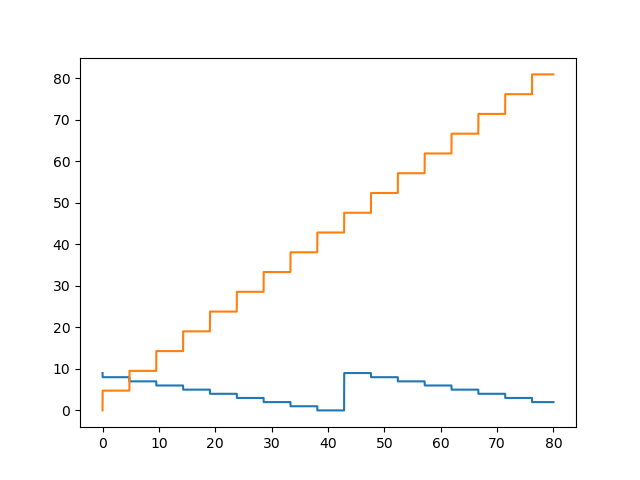

In [14]:
plt.plot(sym[['time']],sym[['countervalue']])
plt.plot(sym[['time']],sym[['clockclock']])